In [16]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder

In [2]:
#importing the dataset
data = pd.read_csv("C:\\Users\\manideepreddy\\OneDrive\\Desktop\\MY DATASETS\\50 startups.csv")

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
#shape of the dataset
data.shape

(50, 5)

In [6]:
#checking null vales
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
#infof
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:>

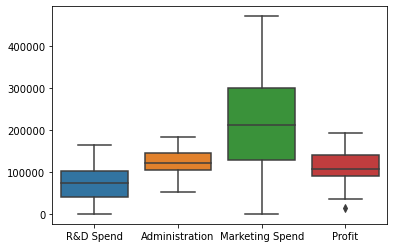

In [10]:
#boxplot
sns.boxplot(data = data)

<AxesSubplot:>

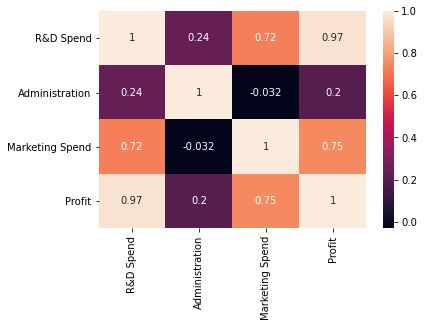

In [15]:
#heatmap
corr = data.corr()
sns.heatmap(corr,annot = True)

In [44]:
#changing the categorical values to numerical values
le = LabelEncoder()
data["State"] = le.fit_transform(data["State"])

In [21]:
#printing head of the data
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [25]:
#dropping profit column from the dataset
x = data.drop("Profit",axis = 1)

In [26]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [27]:
y = data["Profit"]

In [28]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [30]:
#splitting the data into training and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 101)

In [34]:
#printing the head of x_train
x_train.head()

,R&D Spend,Administration,Marketing Spend,State
16,78013.11,121597.55,264346.06,0
24,77044.01,99281.34,140574.81,2
7,130298.13,145530.06,323876.68,1
45,1000.23,124153.04,1903.93,2
18,91749.16,114175.79,294919.57,1


In [35]:
y_train.head()

16    126992.93
24    108552.04
7     155752.60
45     64926.08
18    124266.90
Name: Profit, dtype: float64

In [36]:
#printing the shapes of training and testing sets
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(40, 4) (10, 4) (40,) (10,)


In [45]:
# Fitting Linear Regression to the Training set
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [42]:
#predictins the values 
pred = mlr.predict(x_test)
pred

array([ 88097.64357809, 151424.73588243, 120706.90060874,  99107.3488363 ,
       116701.67455672, 191200.99136337, 112000.87620894,  59709.11709179,
        71208.2783906 ,  48133.23850332])

In [40]:
y_test

37     89949.14
14    132602.65
21    111313.02
32     97427.84
22    110352.25
1     191792.06
26    105733.54
46     49490.75
42     71498.49
47     42559.73
Name: Profit, dtype: float64

In [43]:
r2_score(pred,y_test)

0.9603633324787741